# ML algorithms for Indians Diabetes Prediction

In this laboratory, we worked on
#### 1. Importing libraries
#### 2. Importing DataFrame related to heart disease diagnosis
#### 3. Exploratory Data Analysis (EDA)
#### 4. Data preparation
#### 5. Modeling: supervised vs unsupervised learning


#### **Context**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases (source in kaggle is [here]('https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database/data'). The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. 

#### **Description of the dataset**

The datasets consist of several medical predictor (independent) variables and one target (dependent) variable, Outcome. Independent variables include the number of pregnancies the patient has had, their BMI, insulin level, age, and so on:

- `Pregnancies`: Number of times pregnant (continuous variable)
- `Glucose`: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (continuous variable)
- `BloodPressure`: Diastolic blood pressure (mm Hg) (continuous variable)
- `SkinThickness`: Triceps skin fold thickness (mm) (continuous variable)
- `Insulin`: 2-Hour serum insulin (mu U/ml) (continuous variable)
- `BMI`: Body mass index (weight in kg/(height in m)^2) (continuous variable)
- `DiabetesPedigreeFunction`: Diabetes pedigree function (continuous variable)
- `age`: age (years) (continuous variable)
- `Outcome`: Class variable (0 or 1) 268 of 768 are 1, the others are 0 (0: No diabete, 1: diabete) (binary variable)


These variables are used to analyze risk factors and symptoms associated with diabete diseases.

# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries for data processing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [2]:
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Import the dataframe

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [4]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')

# Exploratory Data Analysis (EDA)

- Display the first five rows of the DataFrame to understand the variables

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


- Display the last five rows of the DataFrame to understand the variables

In [6]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


 - Explore information about the structure, data types, and memory usage of the DataFrame.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Generate descriptive statistics of a DataFrame

In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Shape of the data

In [9]:
data.shape

(768, 9)

- Show columns name

In [10]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

-  Create a histogram of the `age` variable

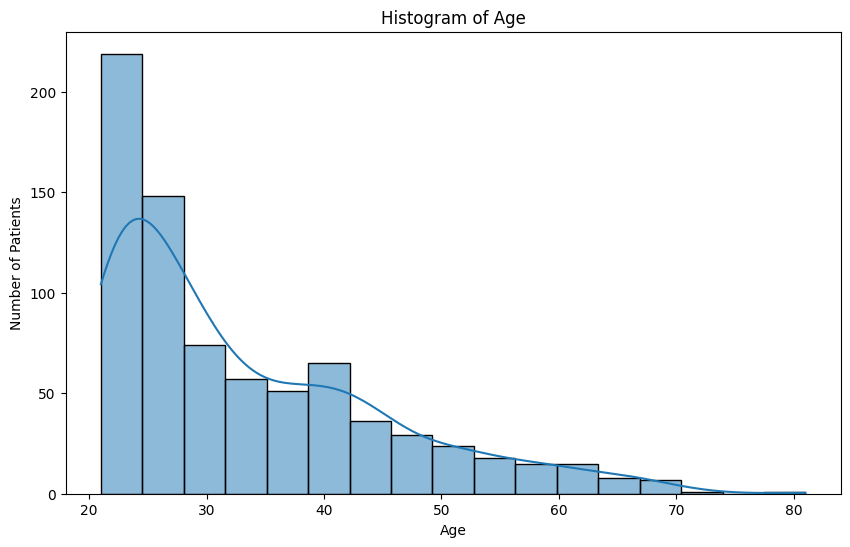

In [11]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using Seaborn
sns.histplot(data['Age'], kde=True)

# Add title and labels
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients')

# Show the plot
plt.show()

-  Create a histogram of the `SkinThickness` variable

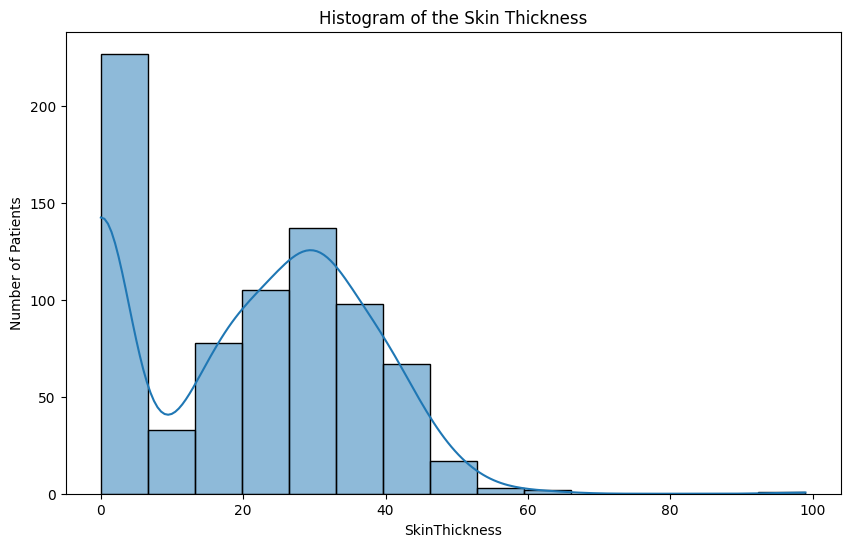

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(data['SkinThickness'], kde=True)

plt.title('Histogram of the Skin Thickness')
plt.xlabel('SkinThickness')
plt.ylabel('Number of Patients')

plt.show()

- Create a heatmap of the correlation matrix to compute the correlation coefficients between all pairs of variables in the DataFrame 

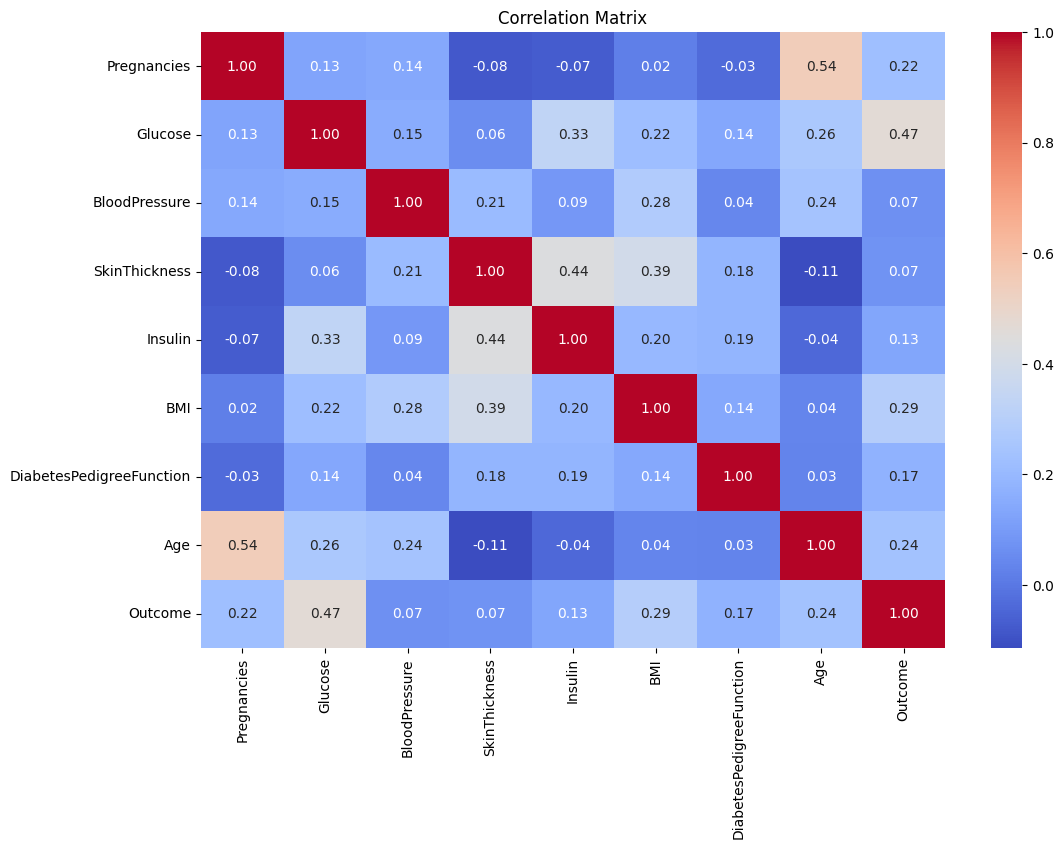

In [13]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap using Seaborn
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')

# Add title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

The colors represent the strength and direction of the correlation (cool colors for negative correlation, warm colors for positive correlation). 

The resulting plot provides a visual representation of how each variable correlates with every other variable in the dataset

- Creating a scatter plot to visualize the relationship between age and BMI levels

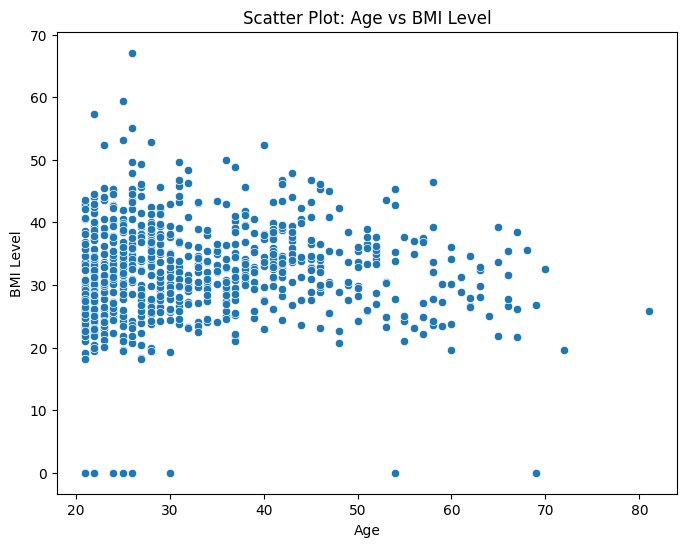

In [14]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a scatter plot using Seaborn
sns.scatterplot(x='Age', y='BMI', data=data)

# Add title and labels
plt.title('Scatter Plot: Age vs BMI Level')
plt.xlabel('Age')
plt.ylabel('BMI Level')

# Show the plot
plt.show()

- Creating a pair plot to visualize the relationships between all the variables to generates a grid of scatter plots where each variable is plotted against every other variable.
The diagonal of the grid displays histograms for each individual variable. The pair plot is useful for quickly visualizing the relationships and distributions between multiple variables in the dataset.

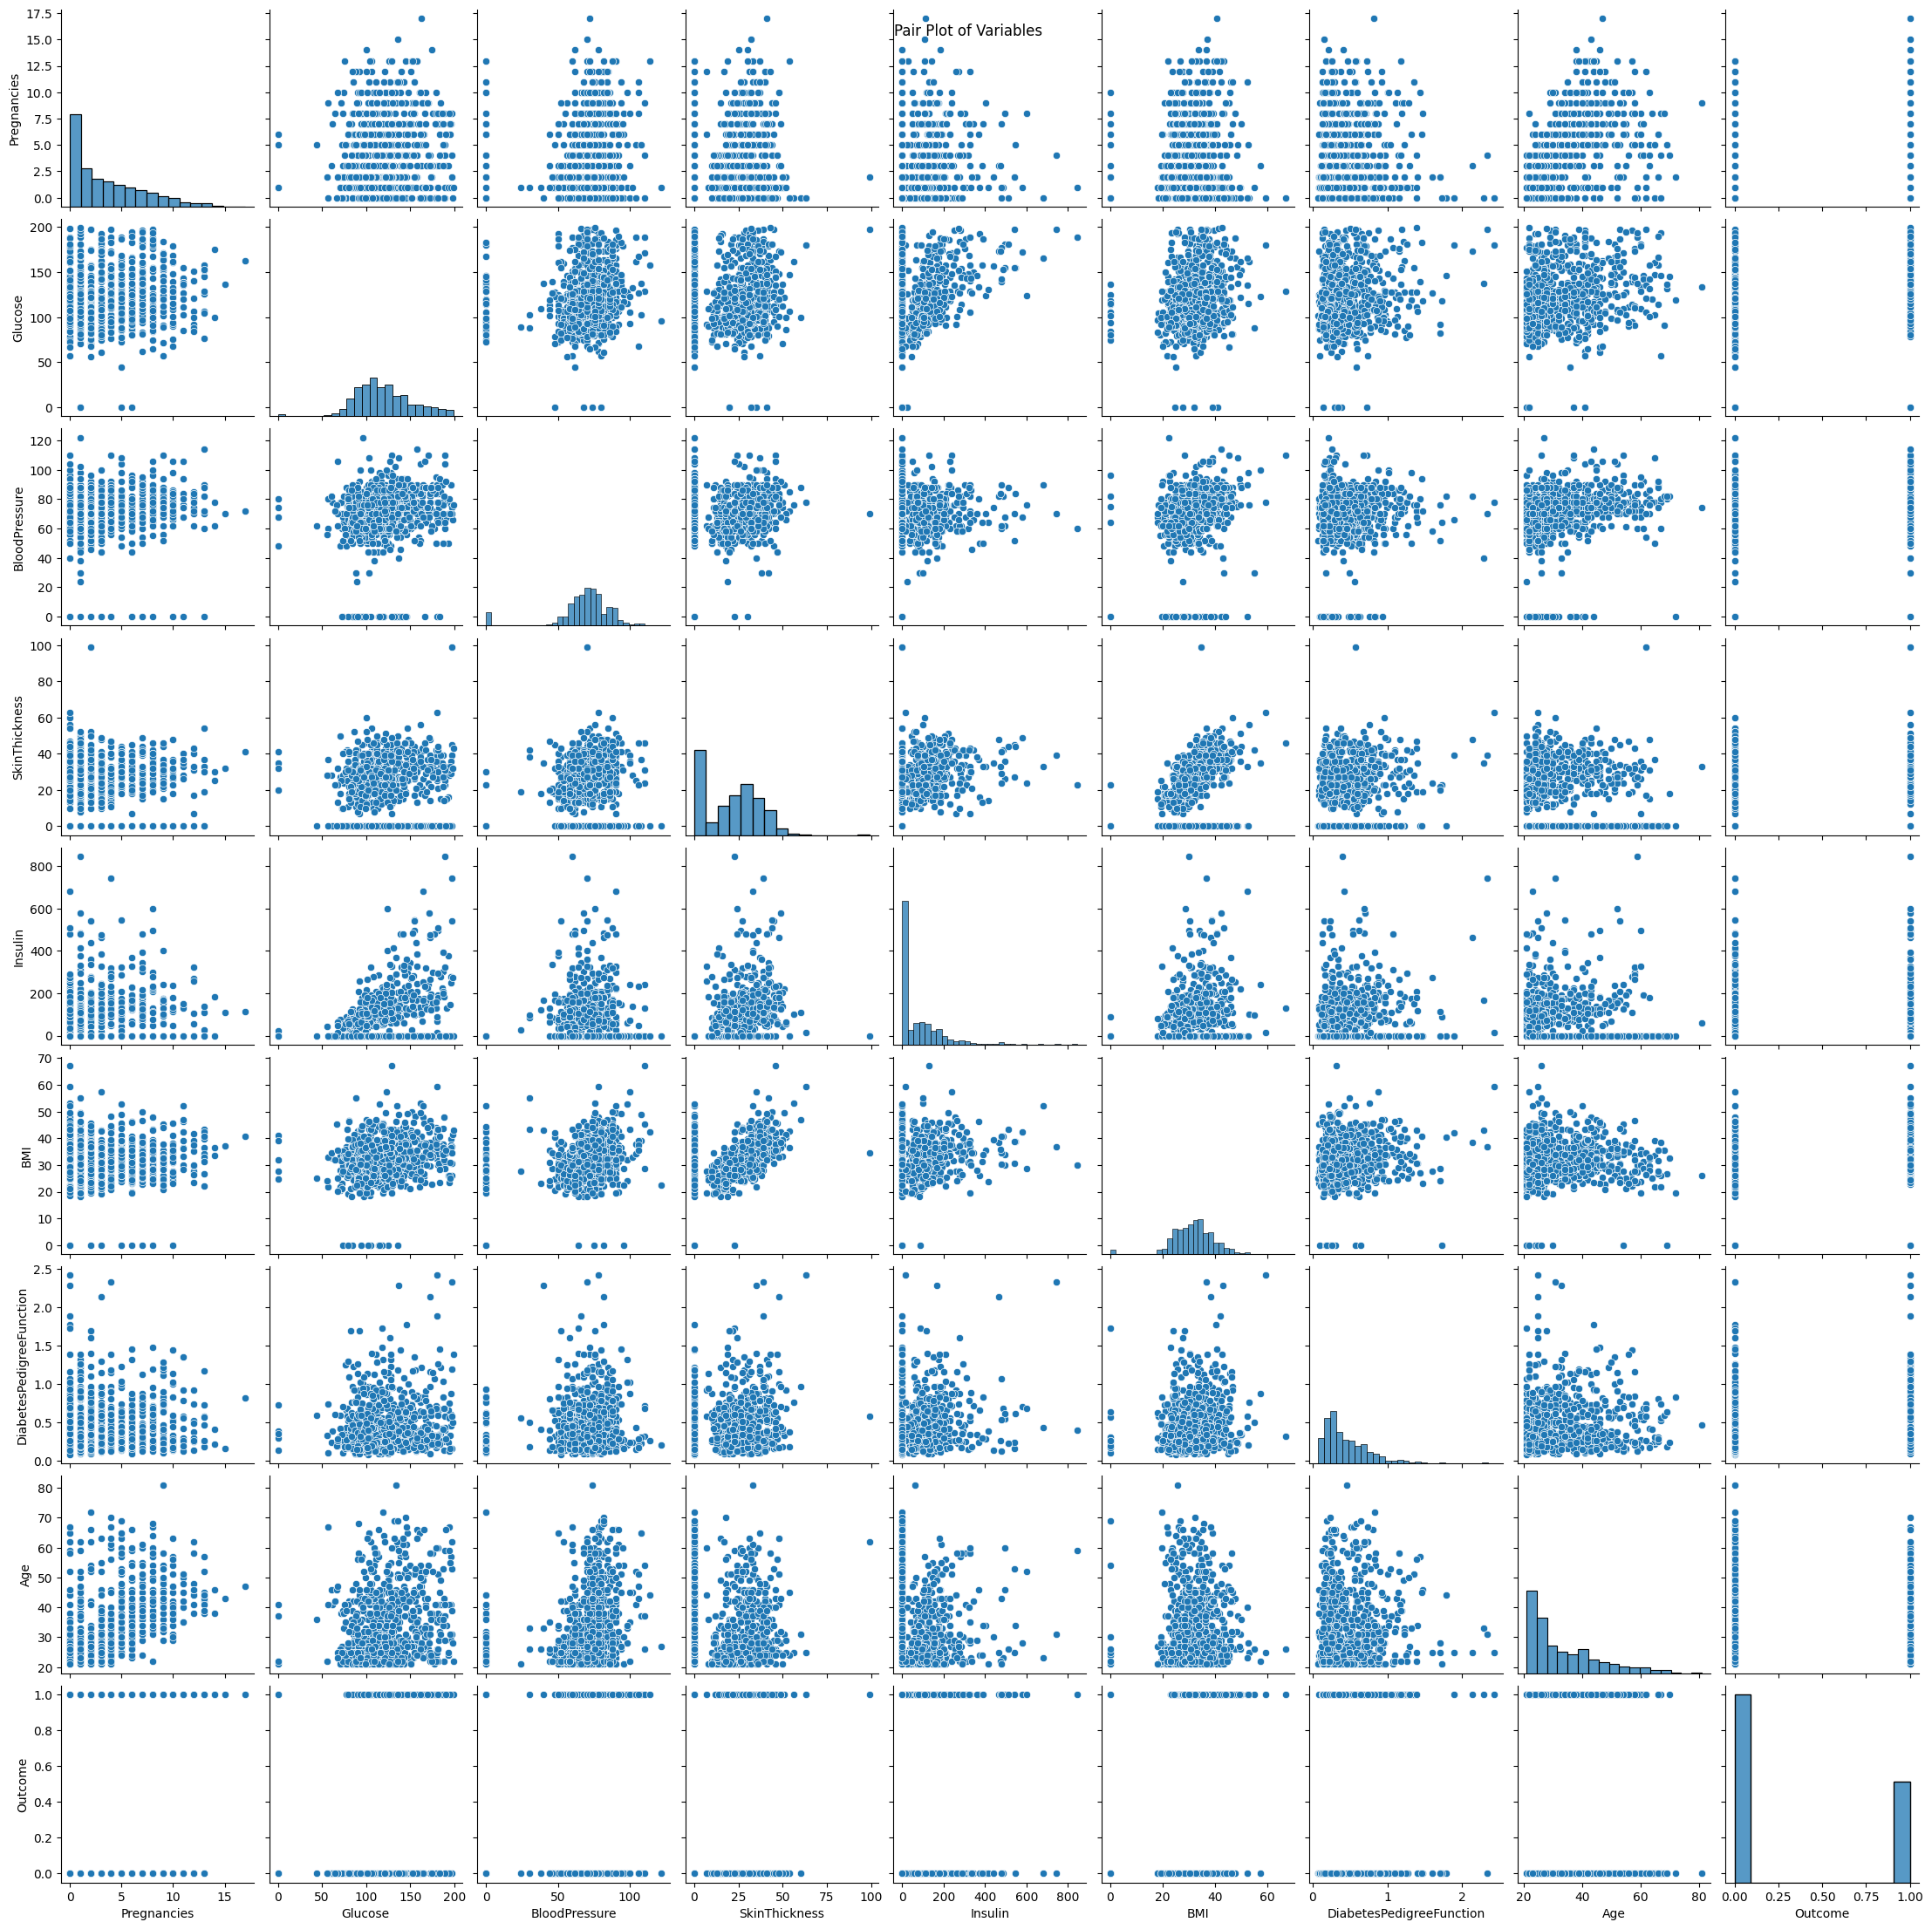

In [15]:
# Create a pair plot using Seaborn
sns.pairplot(data)

# Add a title
plt.suptitle('Pair Plot of Variables')

# Show the plot
plt.show()


- Creating boxplots to visualize the distribution and identify outliers for all the variables to generate a boxplot for each variable, providing a visual representation of the distribution, central tendency, and presence of outliers. 
  Here, the x-axis represents the variables, and the y-axis represents the values.

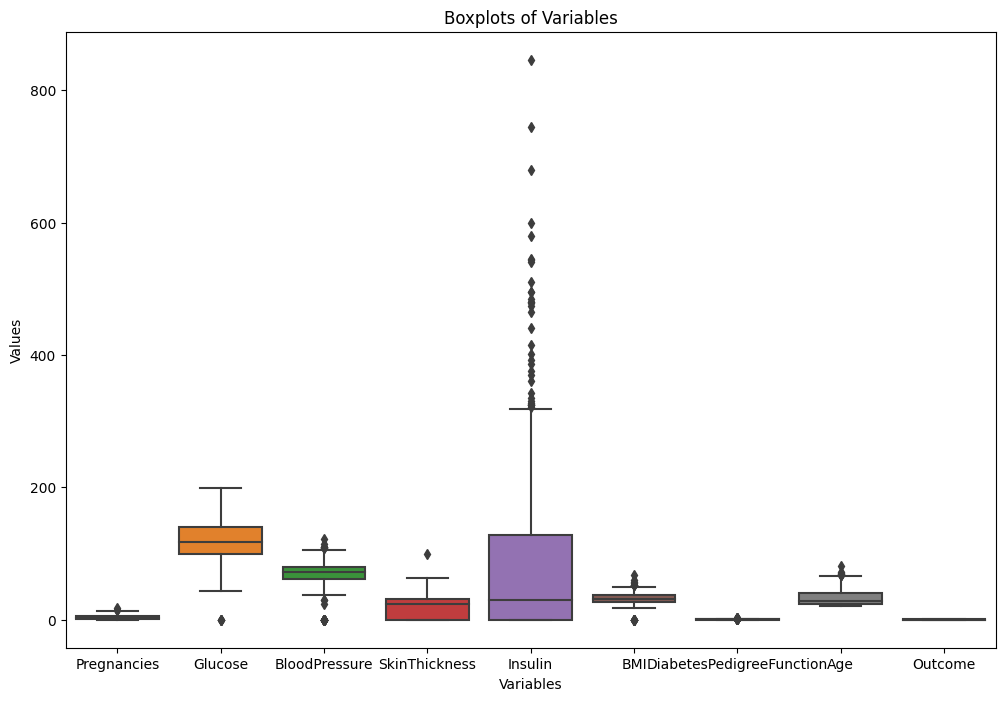

In [16]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create boxplots using Seaborn
sns.boxplot(data=data)

# Add title and labels
plt.title('Boxplots of Variables')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the plot
plt.show()

Tips: show the number of outliers in each column above the boxplots, we calculate and display the count of outliers for each column.

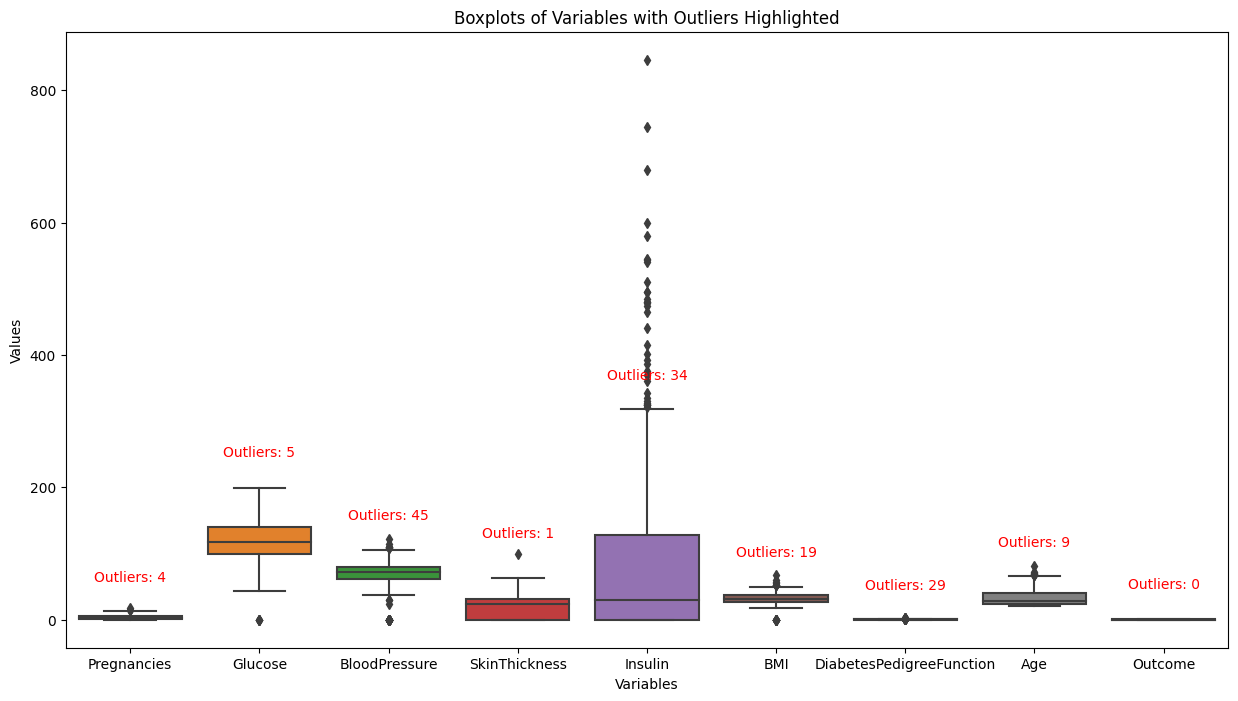

In [17]:
# Calculate the lower and upper bounds for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data < lower_bound) | (data > upper_bound))

# Set the figure size
plt.figure(figsize=(15, 8))

# Create boxplots  
sns.boxplot(data=data)

# Add title and labels
plt.title('Boxplots of Variables with Outliers Highlighted')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the number of outliers for each column above the boxplots
for col in data.columns:
    num_outliers = outliers[col].sum()
    plt.text(data.columns.get_loc(col), upper_bound[col] + 0.1 * (upper_bound.max() - lower_bound.min()),
             f'Outliers: {num_outliers}', ha='center', va='center', color='red')

# Show the plot
plt.show()


- check if there are any missing values in the DataFrame

In [18]:
missing_values = data.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


If we get missing values in a DataFrame, we can Handle them. Here are several common strategies for handling missing values in three or four columns:

1. **Remove Rows with Missing Values:**
   You can remove rows that contain missing values in any of the specified columns using the `dropna()` method. This is suitable if the number of rows with missing values is small.

    ```python
    data.dropna(subset=['Column1', 'Column2', 'Column3', 'Column4'], inplace=True)
    ```

2. **Replace with Default or Specific Values:**
   You can replace missing values with a default value or a specific value based on the characteristics of the data.

    ```python
    data['Column1'].fillna(default_value, inplace=True)
    data['Column2'].fillna(another_value, inplace=True)
    data['Column3'].fillna(specific_value, inplace=True)
    data['Column4'].fillna(another_specific_value, inplace=True)
    ```

3. **Impute with Mean, Median, or Mode:**
   If the missing values are numerical, you can replace them with the mean, median, or mode of the respective columns.

    ```python
    mean_value = data['Column1'].mean()
    data['Column1'].fillna(mean_value, inplace=True)

    median_value = data['Column2'].median()
    data['Column2'].fillna(median_value, inplace=True)

    mode_value = data['Column3'].mode().iloc[0]
    data['Column3'].fillna(mode_value, inplace=True)
    ```

4. **Interpolation:**
   If your data has a temporal or sequential structure, you might consider using interpolation to estimate missing values based on existing values.

    ```python
    data.interpolate(method='linear', inplace=True)
    ```


# Data Preparation

- Handle outliers using the mean. We calculate the lower and upper bounds based on the interquartile range (IQR) and replaces any values outside this range with the mean of the respective column.

**Note:** We compute for each variable:

- Q1: The first quantile (`25%`)
- Q3: The third quantile (`75%`)
- $IQR = Q3 - Q1$
- The $lower_{bound}  = Q1 - 1.5 * IQR$
- The $upper_{bound} = Q3 + 1.5 * IQR$

After that, we replace the outliers by lower and upper bounds

In [19]:
for col in data.columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    iqr = Q3 - Q1
    lower_bound = Q1 - 1.5 * iqr
    upper_bound = Q3 + 1.5 * iqr
    data[col] = np.where((data[col] < lower_bound) | (data[col] > upper_bound), data[col].mean(), data[col])

Tips: I run the cell above three times to handle the outliers by the mean

- Check if there are still any outliers or not

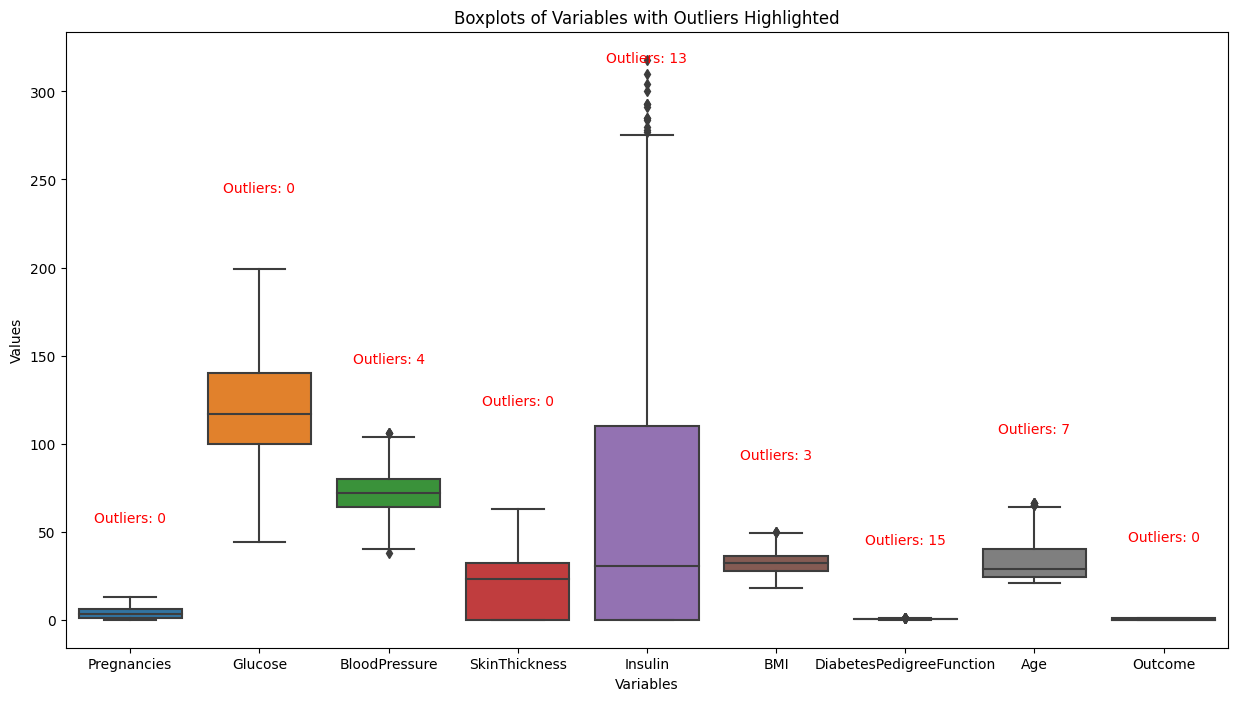

In [20]:
# Calculate the lower and upper bounds for outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((data < lower_bound) | (data > upper_bound))

# Set the figure size
plt.figure(figsize=(15, 8))

# Create boxplots  
sns.boxplot(data=data)

# Add title and labels
plt.title('Boxplots of Variables with Outliers Highlighted')
plt.xlabel('Variables')
plt.ylabel('Values')

# Show the number of outliers for each column above the boxplots
for col in data.columns:
    num_outliers = outliers[col].sum()
    plt.text(data.columns.get_loc(col), upper_bound[col] + 0.1 * (upper_bound.max() - lower_bound.min()),
             f'Outliers: {num_outliers}', ha='center', va='center', color='red')

# Show the plot
plt.show()


Split the de data in to parts or sets; features and target.
 - Target is the column `Outcome`
 - Features are all the columns except the target

In [21]:
X = data.drop('Outcome', axis=1)
y = data['Outcome']

- show the number of observations for each class (1 and 0) in the 'Outcome' column

In [22]:
print(f"Unique values in 'Outcome' column: {y.unique()}")
print(f"Number of unique values in 'Outcome' column: {y.nunique()}")
print(f'Count the number of observations for each class \n: {y.value_counts()}')

Unique values in 'Outcome' column: [1. 0.]
Number of unique values in 'Outcome' column: 2
Count the number of observations for each class 
: Outcome
0.0    500
1.0    268
Name: count, dtype: int64


-  visualize the distribution of unique values in the 'Outcome' column, which contains binary values (1 and 0)

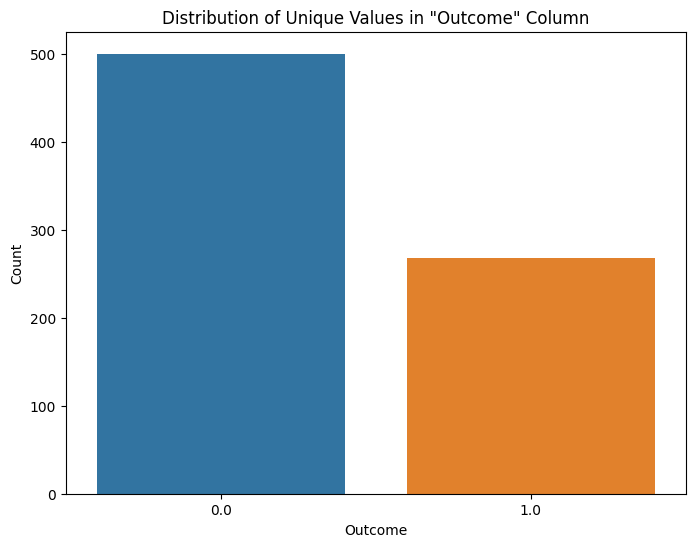

In [23]:
# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=y)
plt.title('Distribution of Unique Values in "Outcome" Column')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

we can also use:

```python
y.value_counts().plot(kind='bar', color=['skyblue', 'lightcoral'])
```

From the statistics describtion of the data (`data.discribe()`), we can see the columns must be scaled

 - Normalizing numeric variables with [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [24]:

scaler = StandardScaler()
X = scaler.fit_transform(X)

- Sow the Normalisation result

In [25]:
X_df = pd.DataFrame(X, columns=data.columns[:-1])
X_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,1.434038e-16,-1.595946e-16,4.255855e-16,1.272131e-17,-7.864080e-17,2.151057e-16,-8.789266e-17,2.266705e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.158789e+00,-2.553955e+00,-3.048148e+00,-1.302538e+00,-8.153544e-01,-2.185127e+00,-1.443178e+00,-1.069690e+00
25%,-8.527940e-01,-7.210503e-01,-7.190618e-01,-1.302538e+00,-8.153544e-01,-7.334514e-01,-7.663432e-01,-7.979675e-01
50%,-2.408039e-01,-1.539182e-01,-2.419844e-03,1.635453e-01,-4.212562e-01,-3.102758e-02,-2.405970e-01,-3.450974e-01
75%,6.771814e-01,6.104773e-01,7.142221e-01,7.372301e-01,6.059836e-01,6.401774e-01,6.159099e-01,6.512168e-01
max,2.819147e+00,2.542014e+00,3.043308e+00,2.713255e+00,3.293605e+00,2.778668e+00,3.101720e+00,3.006141e+00


# Modelling

In this modelling phase we use:
<ol>
 <li>Supervised learning</li>
    <ul>
    <li>decision tree</li>
    <li>logistic regression</li>   
    </ul>
</ol>
For the supervised learning our target is `Outcome`

- Split the data into training set and testing set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- Display the shape of the splited sets: `X_train, X_test, y_train, y_test`

In [27]:
print(f'The shape of training features is: {X_train.shape}')
print(f'The shape of training target is: {y_train.shape}')

print(f'The shape of testing features is: {X_test.shape}')
print(f'The shape of testing target is: {y_test.shape}')

The shape of training features is: (614, 8)
The shape of training target is: (614,)
The shape of testing features is: (154, 8)
The shape of testing target is: (154,)


### Decision Tree classifier
Here are the steps to implement a [Decision Tree classifier]('https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html'):

1. Import the Decision Tree classifier from scikit-learn:

```python
from sklearn.tree import DecisionTreeClassifier
```

2. Create an instance of the Decision Tree classifier:

```python
# we adjust hyperparameters like max_depth, min_samples_split, etc.
tree = DecisionTreeClassifier(max_depth=..., min_samples_split=...)
```

3. Train the classifier using the training data `X_train` and `y_train`:

```python
tree.fit(X_train, y_train)
```

4. Make predictions on the test data `X_test` and store the predicted labels in `y_pred`:

```python
y_pred = tree.predict(X_test)
```

In [28]:
from sklearn.tree import DecisionTreeClassifier


# Create an instance of the Decision Tree classifier
tree = DecisionTreeClassifier()

# Train the classifier using the training data
tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = tree.predict(X_test)

Calculating various performance metrics for a classification model using couple of metrics: 

 
- [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html): The accuracy score is a measure of the overall correctness of a classification model. It is calculated as the ratio of correctly predicted instances to the total number of instances. The mathematical formula for accuracy score is:

$$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$
Mathematically, if we have:
- \( TP \) (True Positives): the number of instances correctly predicted as positive,
- \( TN \) (True Negatives): the number of instances correctly predicted as negative,
- \( FP \) (False Positives): the number of instances incorrectly predicted as positive,
- \( FN \) (False Negatives): the number of instances incorrectly predicted as negative,
then the accuracy can be expressed as:
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

- [precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html): Precision is a metric used in classification to measure the accuracy of the positive predictions made by a model. It is calculated as the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). The precision formula is given by:

$$ \text{Precision} = \frac{\text{True Positives}}{\text{True Positives + False Positives}} $$


- [recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html): Recall, also known as sensitivity or true positive rate, is a metric in classification that measures the ability of a model to identify all relevant instances of a class. It is calculated as the ratio of true positive predictions to the total number of actual positive instances (true positives and false negatives). The recall formula is given by:

$$\text{Recall} = \frac{\text{True Positives}}{\text{True Positives + False Negatives}}$$


- [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html): The F1 score is a metric in classification that combines precision and recall into a single measure. It is the harmonic mean of precision and recall and is particularly useful when there is an uneven class distribution (imbalanced datasets). The F1 score is calculated using the following formula:
$$\text{F1 Score} = \frac{2 \times \text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
the F1 score can be expressed as:
$$\text{F1 Score} = \frac{2 \times \frac{\text{True Positives}}{\text{True Positives + False Positives}} \times \frac{\text{True Positives}}{\text{True Positives + False Negatives}}}{\frac{\text{True Positives}}{\text{True Positives + False Positives}} + \frac{\text{True Positives}}{\text{True Positives + False Negatives}}}$$



In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculation of accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculation of precision
precision = precision_score(y_test, y_pred)

# Calculation of recall
recall = recall_score(y_test, y_pred)

# Calculation of F1 score
f1 = f1_score(y_test, y_pred)

# Displaying the results
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1 * 100))


Accuracy: 72.08%
Precision: 61.54%
Recall: 58.18%
F1 Score: 59.81%


-  plot the confusion matrix for the Decision Tree classifier

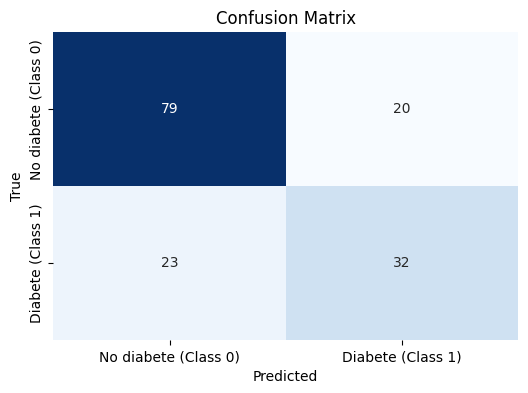

In [30]:
from sklearn.metrics import confusion_matrix


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No diabete (Class 0)', 'Diabete (Class 1)'], 
            yticklabels=['No diabete (Class 0)', 'Diabete (Class 1)'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In a confusion matrix, the elements represent the counts of True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN).

The following table represents the four cases in a confusion matrix:

|                 | Predicted Positive | Predicted Negative |
|-----------------|--------------------|--------------------|
| **Actual Positive** | True Positives (TP) | False Negatives (FN) |
| **Actual Negative** | False Positives (FP) | True Negatives (TN) |


- find the optimal hyperparameters for a Decision Tree classifier using [Grid Search]('https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html')

In [31]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 5, 7, None],  # Maximum depth of the tree
    'min_samples_split': [1, 2, 5, 10]  # Minimum samples required to split an internal node
}

tree = DecisionTreeClassifier()

# Create GridSearchCV instance
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Make predictions on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy * 100:.2f}%')

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Accuracy with Best Model: 75.97%


In [32]:
best_model

DecisionTreeClassifier(max_depth=3)

### Logistic Regression classifier
Here are the steps to implement a [Logistic Regression classifier]('https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html'):

1. Import the Logistic Regression classifier from scikit-learn:

```python
from sklearn.linear_model import LogisticRegression
```

2. Create an instance of the Logistic Regression classifier:

```python
# We can adjust hyperparameters like C (inverse of regularization strength), solver, etc.
logistic_regression = LogisticRegression(C=..., solver=...)
```

3. Train the classifier using the training data `X_train` and `y_train`:

```python
logistic_regression.fit(X_train, y_train)
```

4. Make predictions on the test data `X_test` and store the predicted labels in `y_pred`:

```python
y_pred = logistic_regression.predict(X_test)
```


In [33]:
from sklearn.linear_model import LogisticRegression


# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Train the classifier using the training data
logistic_regression.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 75.32%


- find the optimal hyperparameters for a Logistic Regression classifier using [Grid Search]('https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html')

In [34]:
# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']  # Solver algorithm
}

# Create a Logistic Regression classifier
logistic_regression = LogisticRegression()

# Create GridSearchCV instance
grid_search_lr = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

# Perform grid search on the training data
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search_lr.best_params_)

# Make predictions on the test data using the best model
best_model_lr = grid_search_lr.best_estimator_
y_pred = best_model_lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with Best Model: {accuracy * 100:.2f}%')

Best Hyperparameters: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy with Best Model: 75.97%


In [35]:
best_model_lr

LogisticRegression(C=0.1)